<a href="https://colab.research.google.com/github/Pranali-25/LABS/blob/main/Module%206%20Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Lab 1: Linear Regression, MSE and Polynomial Regression

In [ ]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

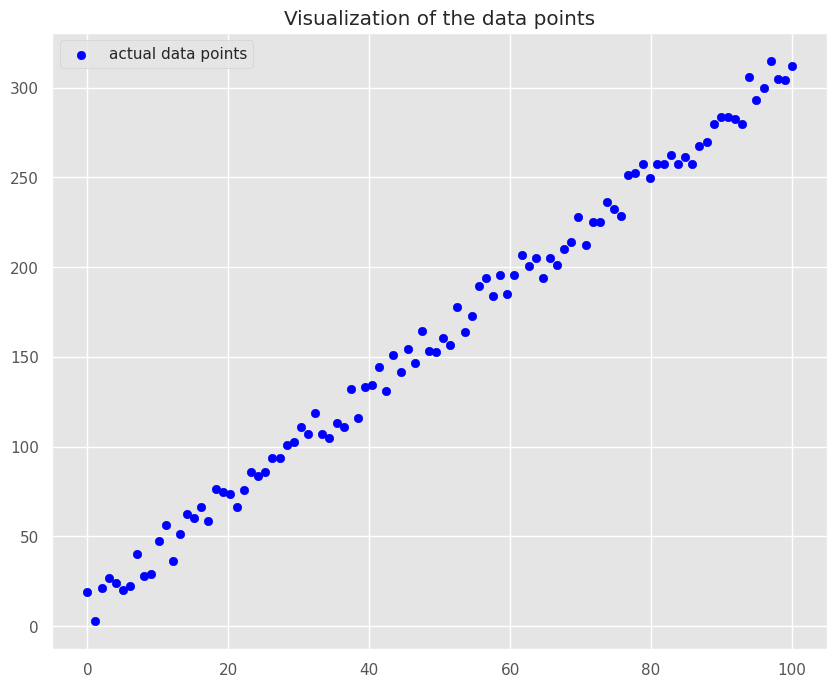

In [ ]:
# generating random data points and adding noise

np.random.seed(10)

x = np.linspace(0,100,100).reshape((-1,1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

plt.title("Visualization of the data points")
plt.scatter(x,y,color="blue")
plt.legend(["actual data points"])
plt.show()


Brute-force solution

In [ ]:
# brute-force solution of rotating line and searching through space of lines for best fit

for m in range(-2,6):
  for c in range(-5,5):
    py = (m*x + c).reshape((-1,1))

    plt.plot(x,py,color="red")
    plt.scatter(x,y,color="blue")
    plt.show()

    print("Average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

This cell output is too large and can only be displayed while logged in.


In [ ]:
def lin_regression(x,y):

  # learning the coefficient and intercept

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)

  # plotting data and predictions

  plt.title("Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))

  # plot training line and test points

The coefficient is: 2.9953957872022334 and the intercept is: 12.534571879892269



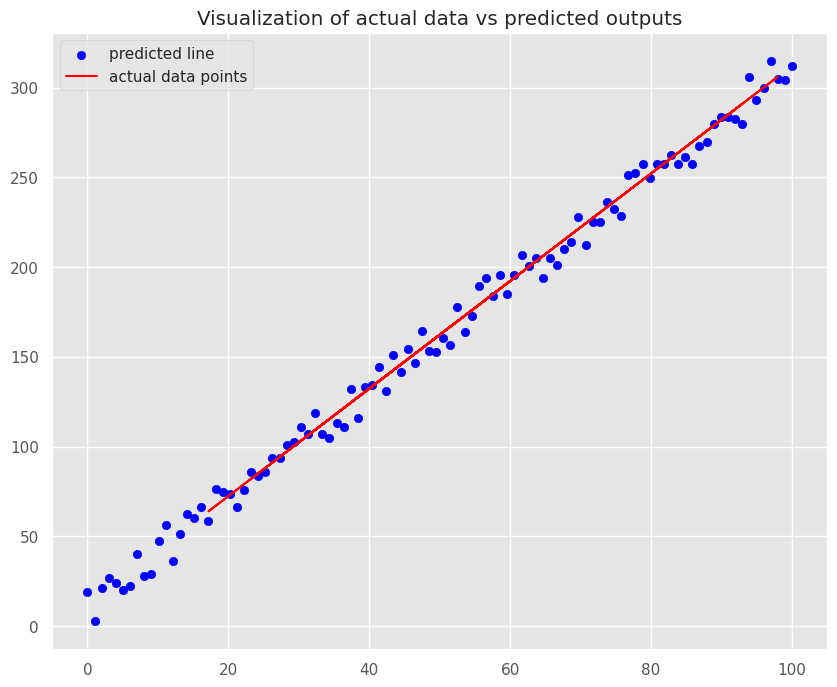

The RMSE for linear regression is: 6.959479191741117


In [ ]:
lin_regression(x,y)

The need for polynomial regression

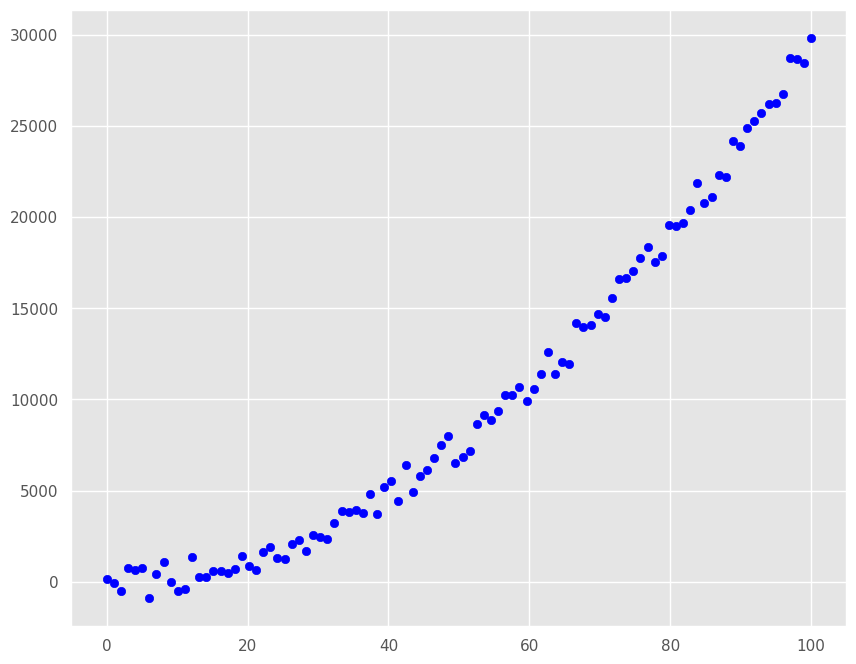

In [ ]:
# simple polynomial with noise

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 3*x**2
plt.scatter(x,y2,color="blue")
plt.show()

In [ ]:
# POLYNOMIAL REGRESSION

def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))

The coefficient is: 299.7940457702775 and the intercept is: -5039.087361688733



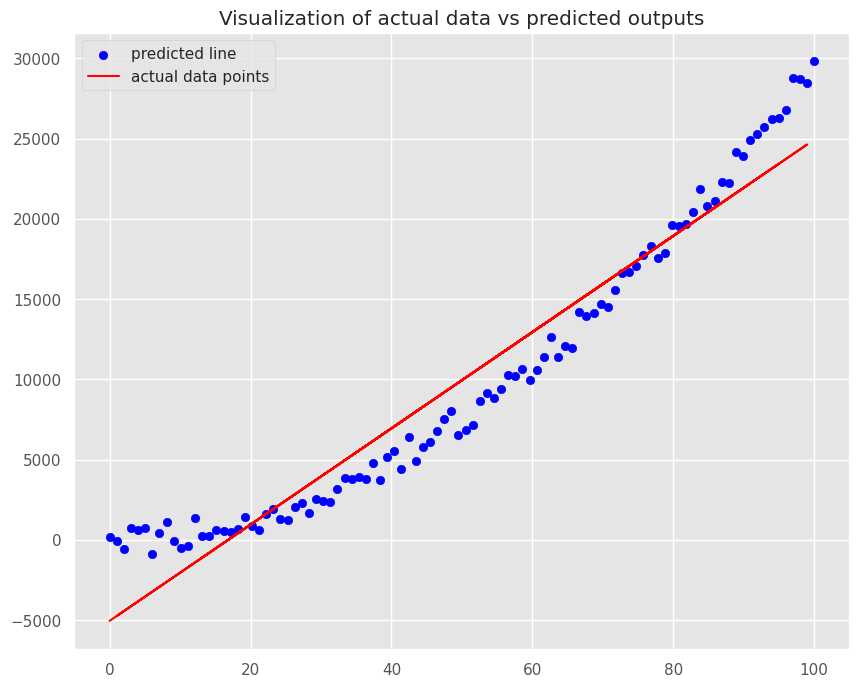

The RMSE for linear regression is: 2535.3983981658753


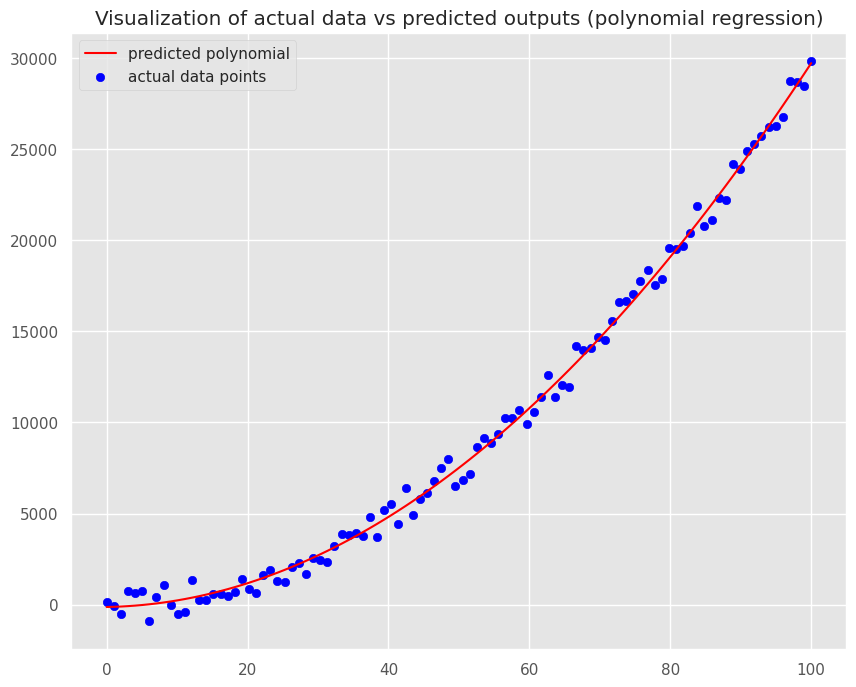

The RMSE for polynomial regression is: 545.8443707772941


In [ ]:
lin_regression(x,y2)

poly_regression(x,y2,2)

Applying linear regression to housing data

In [ ]:
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data,columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
df.head()

# explain correlation in words

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Fetch California housing dataset
housing_data = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

# Add the target variable 'MEDV' to the DataFrame
df['MEDV'] = housing_data.target

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Verbal explanation of correlation
print("\nCorrelation Explanation:")
for column in df.columns:
    if column != 'MEDV':
        corr_value = correlation_matrix['MEDV'][column]
        if abs(corr_value) >= 0.5:
            if corr_value > 0:
                print(f"The feature '{column}' has a strong positive correlation with 'MEDV'.")
            else:
                print(f"The feature '{column}' has a strong negative correlation with 'MEDV'.")
        else:
            print(f"The feature '{column}' has a weak correlation with 'MEDV'.")


Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDV        0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude      MEDV  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -

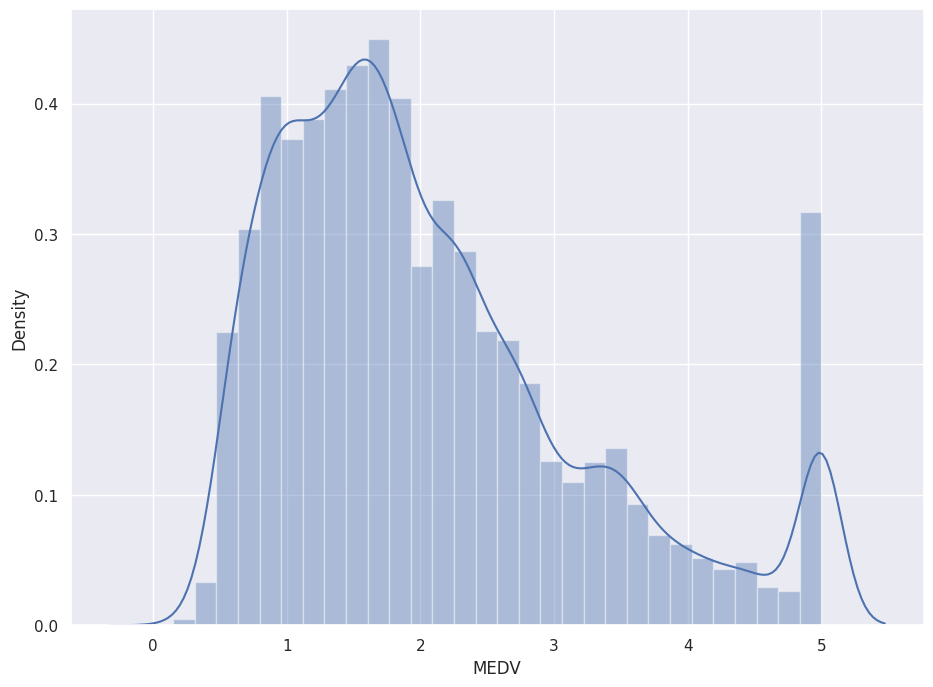

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

<Axes: >

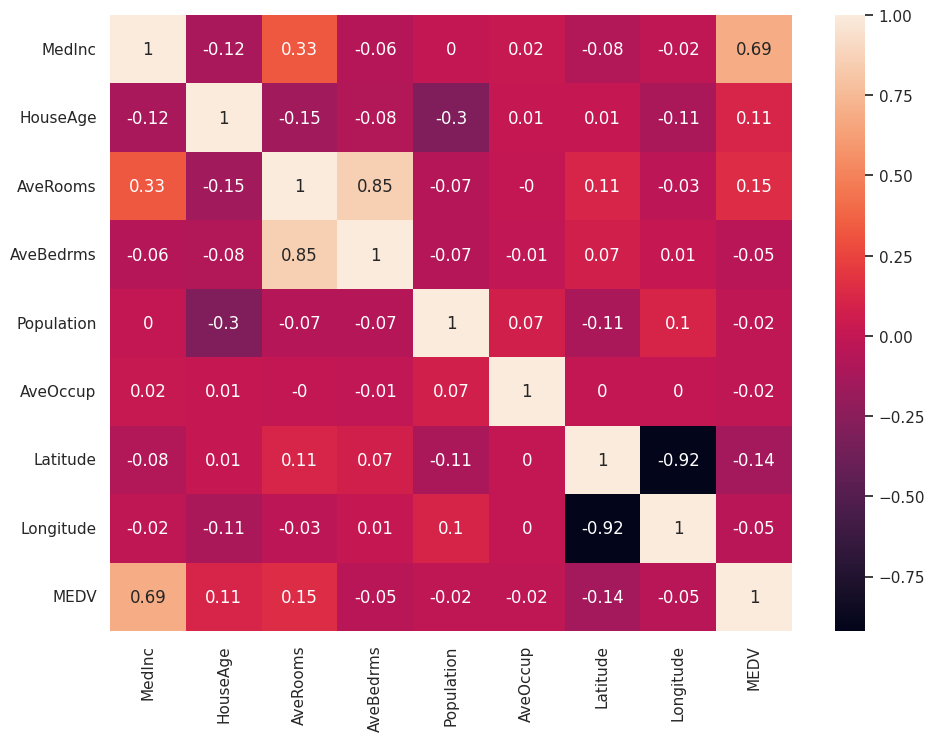

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

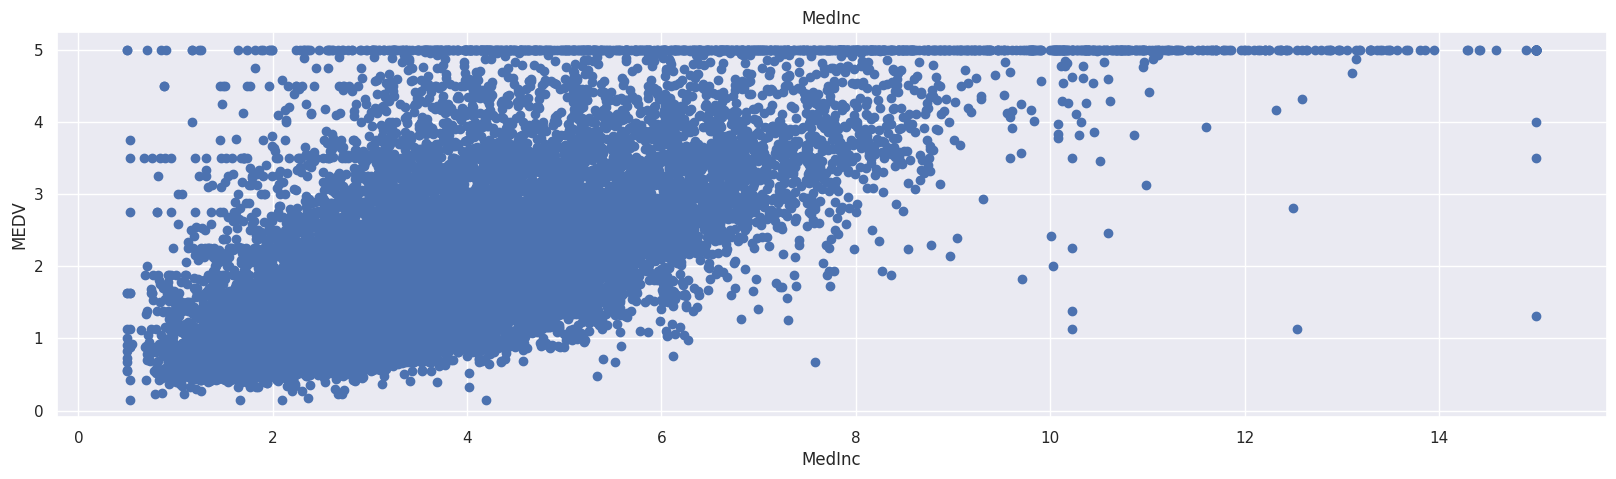

In [ ]:
plt.figure(figsize=(20, 5))

features = ['MedInc']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
x_ex = pd.DataFrame(np.c_[df['MedInc']], columns = ['MedInc'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=42)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [ ]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 0.8361487409655547

Model performance for testing set
--------------------------------------
RMSE is 0.8420901241414455


Exercises

1. Higher Degree Polynomials

We have seen a graph of a linear regression model attempting to represent polynomial data, and how it falls short when trying to model non-linear data. Now, what if we took some non-linear noisy data, and fit a very high degree polynomial to it? Try to guess what would happen!

(Change the polynomial degree in the slider and run the cell)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, widgets

# Generate non-linear noisy data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 1.5 * X**2 + np.random.randn(100, 1)

# Function to fit and plot polynomial regression
def fit_and_plot_polynomial(degree):
    # Transform features to polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    # Fit linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # Plot the original data
    plt.scatter(X, y, label='Original Data')

    # Plot the fitted polynomial curve
    X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = lin_reg.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, label=f'Degree {degree} Polynomial', color='red')

    plt.title('Polynomial Regression with Different Degrees')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Use a slider to interactively change the polynomial degree
interact(fit_and_plot_polynomial, degree=widgets.IntSlider(min=1, max=20, step=1, value=1))


interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), Output()), _dom_classes=('widge…

<function __main__.fit_and_plot_polynomial(degree)>

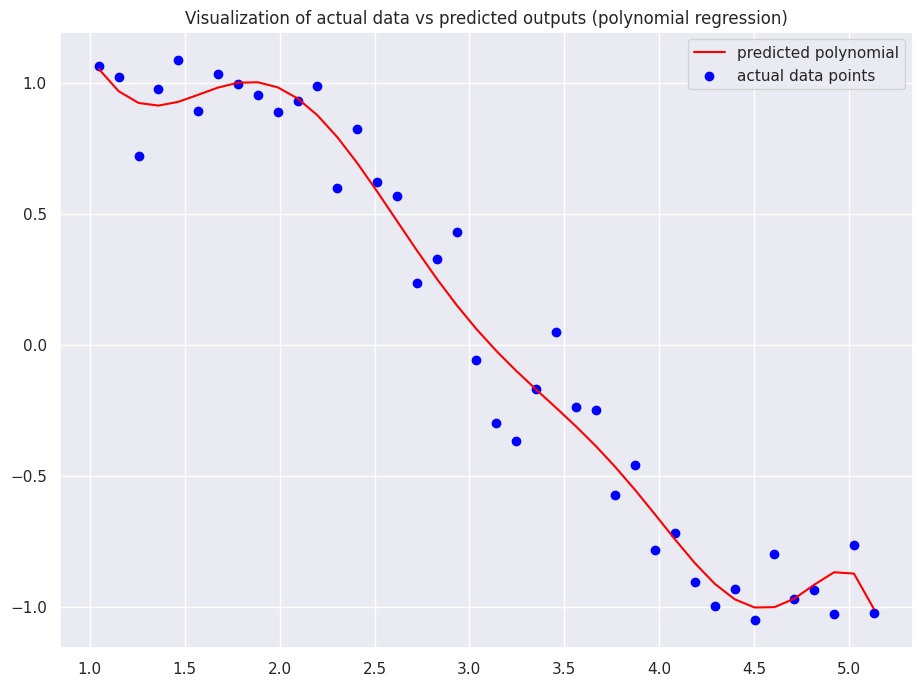

The RMSE for polynomial regression is: 0.12954423337353976


In [ ]:
deg = 8#@param {type:"slider", min: 1, max:15, step:1}

np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)